<a href="https://colab.research.google.com/github/snigdha2606/SE20UARI146_Assignment3_Q1/blob/main/RUL_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [19]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [20]:
train=pd.read_csv("/content/train_FD001.txt",sep=" ",names=columns)   ## to read txt into dataframe
test=pd.read_csv("/content/test_FD001.txt",sep=" ",names=columns)
test_result=pd.read_csv("/content/RUL_FD001.txt",sep=" ",header=None)

In [21]:
test_result.columns=["rul","null"]
test_result.drop(["null"],axis=1,inplace=True)
test_result["id"]=test_result.index+1
rul=pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']
test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.drop(['rul'],axis=1,inplace=True)
test=test.merge(test_result,on=['id'],how='left')
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [22]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)
df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']
cycle=30
df_train['label']=df_train["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)
df_test['label']=df_test["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)
df_train

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [23]:
df_test.drop(["id","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label

print('x shape :',x.shape)
print('y shape :',y.shape)

x shape : (20631, 16)
y shape : (20631,)


In [25]:
# Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)
y_pred = lr_regressor.predict(x_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# Ensure the test data only includes the features used for training
df_test = df_test.drop(["cycle", "label", "remaining_cycle", "rul_failed"], axis=1)

df_test_pred = lr_regressor.predict(df_test)

R2 Score:  0.5452694017837947
Mean Squared Error:  0.055241980467405395


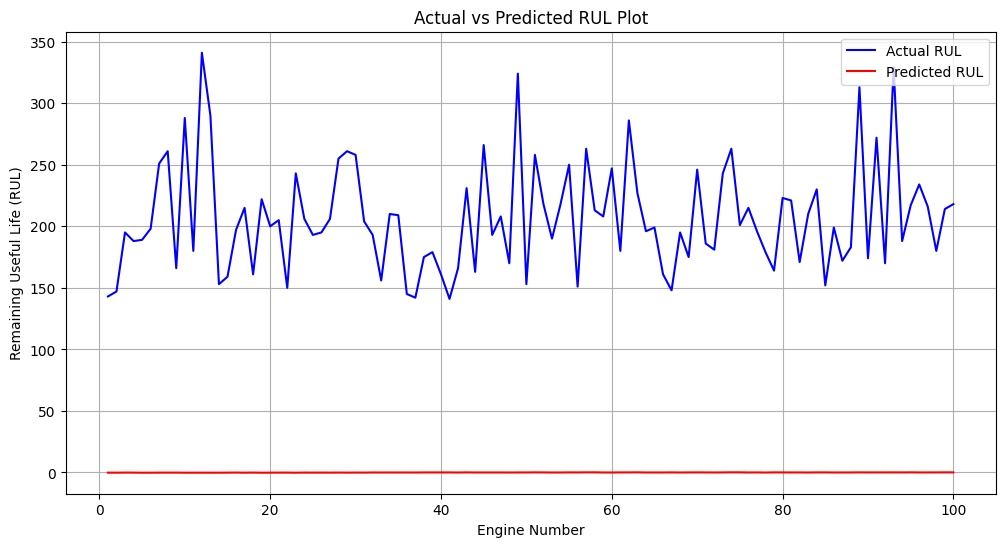

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame 'df_test' containing your RUL data
# If you don't already have it, you can create it using:
# df_test = test_result.copy()
# df_test['engine_number'] = df_test.index + 1

# Create a line plot of actual RUL vs. engine number
plt.figure(figsize=(12, 6))
plt.plot(df_test['engine_number'], df_test['rul_failed'], color='blue', label='Actual RUL')
plt.xlabel('Engine Number')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Actual RUL vs Engine Number Plot')

# Create a line plot of predicted RUL vs. engine number
engine_numbers = df_test['engine_number']
predicted_rul = [df_test_pred[idx] for idx in range(len(engine_numbers))]
plt.plot(engine_numbers, predicted_rul, color='red', label='Predicted RUL')
plt.xlabel('Engine Number')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Actual vs Predicted RUL Plot')
plt.legend()
plt.grid(True)
plt.show()
